## Computation ACME-Pandas 3 

### 9. Pandas III: Grouping  


* #### August 1, 2019
* #### SP Tian 

In [1]:
# Import packages and set up 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline 

from pydataset import data

### Problem 1 

Species
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

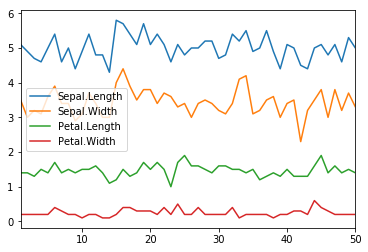

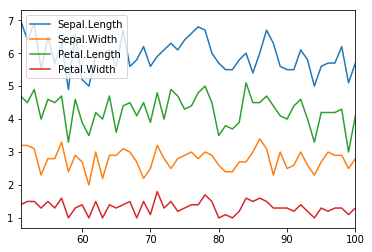

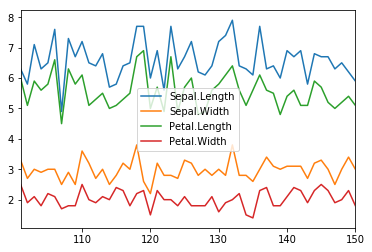

In [2]:
iris = data("iris")
species = iris.groupby("Species")
list(species.groups)
species.plot(by = "Species")
#species.boxplot(["Sepal.Length", "Sepal.Width"])
#species.boxplot(["Petal.Length", "Petal.Width"])

**Answer**: 
1. virginica is easiest to distinguish because the petal length is very close to sepal length, and its petal length is around 5 to 7. 
2. If iris data is without species label, we need to use unsupervised learning such as K-Means(KNN) or PCA as strategies to indentify the species. 

Text(0.5, 1.0, 'Measurements of Species of Iris')

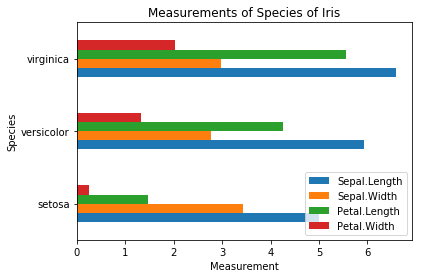

In [3]:
species[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].mean().plot(kind = "barh")
plt.xlabel("Measurement")
plt.title("Measurements of Species of Iris")

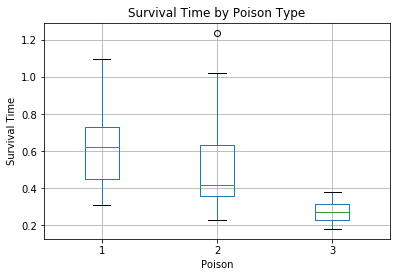

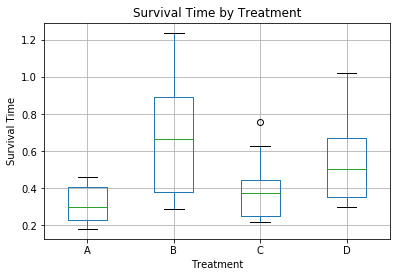

In [4]:
poison = data("poisons")

poison.boxplot(["time"], by = "poison")
plt.xlabel("Poison")
plt.ylabel("Survival Time")
plt.suptitle("")
plt.title("Survival Time by Poison Type")
plt.show()

poison.boxplot(["time"], by = "treat")
plt.xlabel("Treatment")
plt.ylabel("Survival Time")
plt.suptitle("")
plt.title("Survival Time by Treatment")
plt.show()

**Answer**: 
1. In general, the most deadly poison is type 1 and the most effective treatment is type A. 
2. If I were ever poisoned, I would certainly choose treatment A if I didn't know the poison type will choose accordingly if I know the type. But certainly it requires more sophisticated machine learning techniques to classify.  

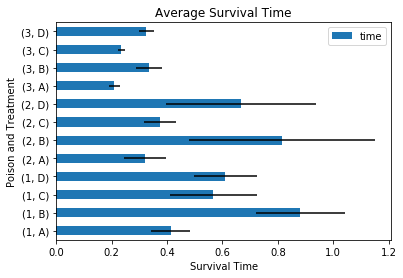

In [5]:
types = poison.groupby(["poison", "treat"])
types[["time"]].mean().plot(kind="barh", xerr=types.std(), title="Average Survival Time")
plt.xlabel("Survival Time")
plt.ylabel("Poison and Treatment")
plt.show()

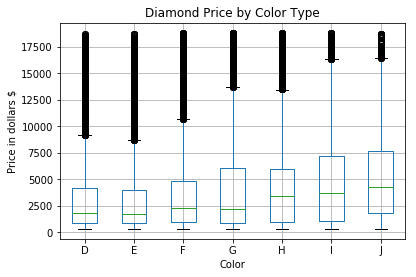

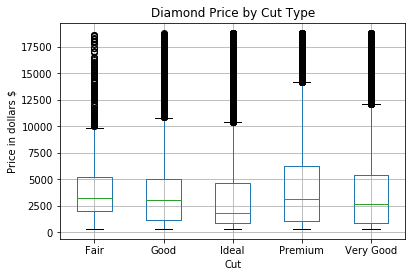

In [12]:
diamond = data("diamonds")
diamond.boxplot(["price"], by = "color")
plt.xlabel("Color")
plt.ylabel("Price in dollars $")
plt.suptitle("")
plt.title("Diamond Price by Color Type")
plt.show()

diamond.boxplot(["price"], by = "cut")
plt.xlabel("Cut")
plt.ylabel("Price in dollars $")
plt.suptitle("")
plt.title("Diamond Price by Cut Type")
plt.show()

**Answer**: 
1. Certain colors do effect the price of diamonds, but the price ranges of all colors still lie between the same range. However, cut has heterogenous effects on its price. For instance, diamonds w fair cut are priced higher, on average, than those w ideal cut. 
2. There are so many other factors effecting the price of diamonds. For example, the size/carat within the dataset might help explain this unintuitive statement. 

### Pivot Table 

In [13]:
hec = data("HairEyeColor")
for col in ["Hair", "Eye", "Sex"]: 
    print("{}: {}".format(col, ", ".join(set(str(x) for x in hec[col]))))

Hair: Black, Red, Brown, Blond
Eye: Brown, Blue, Green, Hazel
Sex: Female, Male


In [14]:
hec.pivot_table(values = "Freq", index = ["Hair", "Eye"], columns = "Sex")

Sex          Female  Male
Hair  Eye                
Black Blue        9    11
      Brown      36    32
      Green       2     3
      Hazel       5    10
Blond Blue       64    30
      Brown       4     3
      Green       8     8
      Hazel       5     5
Brown Blue       34    50
      Brown      66    53
      Green      14    15
      Hazel      29    25
Red   Blue        7    10
      Brown      16    10
      Green       7     7
      Hazel       7     7

In [16]:
titanic = pd.read_csv("titanic_clean.csv")
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)
titanic.dropna(inplace = True) 

titanic.pivot_table(values = "Survived", index = "Sex", columns = "Pclass")

Pclass,1.0,2.0,3.0
Sex,,,
female,0.964789,0.886792,0.490741
male,0.340782,0.146199,0.152439


In [17]:
# Equivalently, 
titanic.groupby(["Sex", "Pclass"])["Survived"].mean().unstack()

Pclass,1.0,2.0,3.0
Sex,,,
female,0.964789,0.886792,0.490741
male,0.340782,0.146199,0.152439


In [18]:
titanic.pivot_table(values = "Survived", index = "Sex", 
                    columns = "Pclass", aggfunc = "count")

Pclass,1.0,2.0,3.0
Sex,,,
female,142,106,216
male,179,171,492


In [19]:
titanic.pivot_table(values = "Survived", index = "Sex", 
                    columns = "Pclass", aggfunc = "sum")

Pclass,1.0,2.0,3.0
Sex,,,
female,137.0,94.0,106.0
male,61.0,25.0,75.0


In [20]:
# pd.cut() maps continuous entries to discrete intervals. 
pd.cut([6,1,2,3,4,5,6,7], [0,4,8])

[(4, 8], (0, 4], (0, 4], (0, 4], (0, 4], (4, 8], (4, 8], (4, 8]]
Categories (2, interval[int64]): [(0, 4] < (4, 8]]

In [23]:
age = pd.cut(titanic["Age"], [0, 12, 18, 80])
print(titanic.pivot_table(values = "Survived", index = ["Sex", age], 
                   columns = "Pclass", aggfunc = "mean"))
print("\t")
print(titanic.pivot_table(values = "Survived", index = ["Sex", age], 
                   columns = "Pclass", aggfunc = "count"))

Pclass                1.0       2.0       3.0
Sex    Age                                   
female (0, 12]   0.000000  1.000000  0.466667
       (12, 18]  1.000000  0.875000  0.607143
       (18, 80]  0.968992  0.870588  0.474684
male   (0, 12]   1.000000  1.000000  0.342857
       (12, 18]  0.500000  0.000000  0.081081
       (18, 80]  0.321637  0.093333  0.142857
	
Pclass           1.0  2.0  3.0
Sex    Age                    
female (0, 12]     1   13   30
       (12, 18]   12    8   28
       (18, 80]  129   85  158
male   (0, 12]     4   11   35
       (12, 18]    4   10   37
       (18, 80]  171  150  420


In [24]:
# pd.qcut() partitions entries into equally populated intervals.
pd.qcut([1, 2, 5, 6, 8, 3], 2)

[(0.999, 4.0], (0.999, 4.0], (4.0, 8.0], (4.0, 8.0], (4.0, 8.0], (0.999, 4.0]]
Categories (2, interval[float64]): [(0.999, 4.0] < (4.0, 8.0]]

In [25]:
fare = pd.qcut(titanic["Fare"], 2)
titanic.pivot_table(values = "Survived", index = ["Sex", age], 
                   columns = [fare, "Pclass"], aggfunc = "count", 
                   fill_value = "-")

Fare            (-0.001, 14.454]            (14.454, 512.329]            
Pclass                       1.0 2.0    3.0               1.0   2.0   3.0
Sex    Age                                                               
female (0, 12]                 -   -    7.0               1.0  13.0  23.0
       (12, 18]                -   4   23.0              12.0   4.0   5.0
       (18, 80]                -  31  101.0             129.0  54.0  57.0
male   (0, 12]                 -   -    8.0               4.0  11.0  27.0
       (12, 18]                -   5   26.0               4.0   5.0  11.0
       (18, 80]                8  94  350.0             163.0  56.0  70.0

### Problem 2 

In [28]:
titanic.pivot_table(values = "Survived", index = "Embarked")

,Survived
Embarked,
C,0.555556
Q,0.357724
S,0.332968


In [26]:
titanic.pivot_table(values = "Survived", index = "Sex", columns = "Embarked")

Embarked,C,Q,S
Sex,,,
female,0.902655,0.616667,0.680412
male,0.305732,0.111111,0.170418


In [33]:
print("Embarked w Sex and Fare\n", titanic.pivot_table(
    values = "Survived", index = ["Sex", fare], columns = "Embarked"))
print("\t")
print("Embarked w Sex and Age\n", titanic.pivot_table(
    values = "Survived", index = ["Sex", age], columns = "Embarked"))

Embarked w Sex and Fare
 Embarked                         C         Q         S
Sex    Fare                                           
female (-0.001, 14.454]   0.750000  0.583333  0.581633
       (14.454, 512.329]  0.935484  0.750000  0.730570
male   (-0.001, 14.454]   0.209677  0.120000  0.129288
       (14.454, 512.329]  0.368421  0.076923  0.234568
	
Embarked w Sex and Age
 Embarked                C        Q         S
Sex    Age                                  
female (0, 12]   0.888889      NaN  0.542857
       (12, 18]  0.800000  0.50000  0.777778
       (18, 80]  0.921348  0.62963  0.689956
male   (0, 12]   0.714286  0.00000  0.578947
       (12, 18]  0.333333      NaN  0.066667
       (18, 80]  0.284722  0.12069  0.150278


3. C = Cherbourg, Q = Queenstown, S = Southampton; showing that people from Cherbourg did have a higher survival rate. 

4. Perhaps surprisingly, those females who embarked from Q and S with the most expensive tickets were actually less likely to survive than those with less expensive tickets. Also, those two other pivot table supports statement 3. 

### Problem 3 

In [35]:
npk = data("npk")
# nitrogen (N), phosphate (P), and potassium (K)
npk.pivot_table(values = "yield", index = ["N", "P", "K"])

yield
N P K           
0 0 0  51.433333
    1  52.000000
  1 0  54.333333
    1  50.500000
1 0 0  63.766667
    1  54.666667
  1 0  57.933333
    1  54.366667

1. Element N is the most effective and element K is the least effective. 
2. Combination of N only is actually the optimal, and combination of K only is the worst. 

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

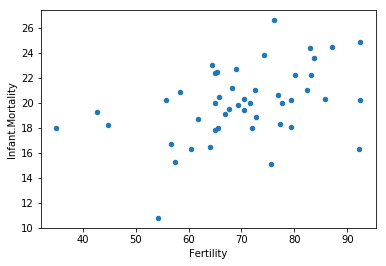

In [52]:
swiss = data("swiss")
swiss.plot(kind = "scatter", x = "Fertility", y = "Infant.Mortality")

catho = pd.qcut(swiss["Catholic"], 5)
swiss.pivot_table(values = "Fertility", index = catho, aggfunc = "count", fill_value = "-")

**Description**: standardized fertility measures and socio-economic indicators for French-speaking provinces of Switzerland at about 1888. 

1. Relationship: linear 
2. Somehow with more predominatly Catholic, the fertility rate of the provices shows higher. 

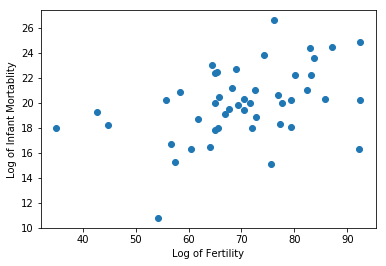

In [59]:
log_fertility = swiss["Fertility"]
log_inf_mortality = swiss["Infant.Mortality"]
plt.scatter(log_fertility, log_inf_mortality)
plt.xlabel("Log of Fertility")
plt.ylabel("Log of Infant Mortablity")
plt.show()